In [1]:
FILE_PATH = r"..\dataset\survey_results.csv"

In [2]:
import pandas as pd
import seaborn as sns
import scipy

import matplotlib.pyplot as plt

In [3]:
df_results = pd.read_csv(FILE_PATH)
df_results.head()

,Timestamp,Are you a NUS / Yale-NUS student that is 18 years old and above?,"I have read about the purpose of this research study, agree to participate, and understand that I can withdraw at any time.",What is your major / prospective major?,Do you have any experience with AI / data science / programming?,Do you have any experience with regarding data privacy / law?,Are you concerned about your data privacy?,How would you rate your capability in protecting your online data?,Do you think decisions that are made by AI can be useful to society?,Do you think decisions made by AI are fair?,...,Think that using the model is a method that could be a risk to society?.3,Trust the prediction made by the model?.3,Think that using the model is an effective method of identifying violations of the PDPA?.4,Think that using the model is a fair method of identifying violations of the PDPA?.4,Think that using the model is a method that could be a risk to society?.4,Trust the prediction made by the model?.4,Think that using the model is an effective method of identifying violations of the PDPA?.5,Think that using the model is a fair method of identifying violations of the PDPA?.5,Think that using the model is a method that could be a risk to society?.5,Trust the prediction made by the model?.5
0,2023/01/30 4:34:41 PM GMT+8,Yes,Yes,Environmental Studies,3,1,2,2,4,3,...,2,2,2,2,2,2,2,2,3,2
1,2023/01/30 5:02:57 PM GMT+8,Yes,Yes,Global Affairs / Political Science,2,3,2,1,5,4,...,2,1,2,2,2,1,4,3,2,4
2,2023/01/30 5:14:27 PM GMT+8,Yes,Yes,Economics,3,3,4,2,5,3,...,2,3,1,1,1,1,1,1,1,1
3,2023/01/30 6:05:25 PM GMT+8,Yes,Yes,Law,1,4,4,4,3,2,...,2,3,2,2,1,2,3,2,2,4
4,2023/01/30 6:06:22 PM GMT+8,Yes,Yes,Law,1,1,3,3,5,3,...,3,3,1,1,2,3,2,2,3,3


In [4]:
# Create unique IDs for each respondent
df_results["id"] = [n for n in range(len(df_results))]

#### Segment the columns according to the parts in the survey

Choosing the col indexes of the dataframe corresponding to the parts of the survey

In [5]:
# Demographic data
print(df_results.columns[3:11])

Index(['What is your major / prospective major?',
       'Do you have any experience with AI / data science / programming?',
       'Do you have any experience with regarding data privacy / law?',
       'Are you concerned about your data privacy?',
       'How would you rate your capability in protecting your online data?',
       'Do you think decisions that are made by AI can be useful to society?',
       'Do you think decisions made by AI are fair?',
       'Do you think decisions made by AI can be a risk to society?'],
      dtype='object')


In [6]:
# Part 2: three Contexts initial survey
print(df_results.columns[12:24])

Index(['Think that using the model is an effective method of identifying violations of the PDPA?',
       'Think that using the model is a fair method of identifying violations of the PDPA?',
       'Think that using the model is a method that could be a risk to society?',
       'Trust the prediction made by the model?',
       'Think that using the model is an effective method of identifying violations of the PDPA?.1',
       'Think that using the model is a fair method of identifying violations of the PDPA?.1',
       'Think that using the model is a method that could be a risk to society?.1',
       'Trust the prediction made by the model?.1',
       'Think that using the model is an effective method of identifying violations of the PDPA?.2',
       'Think that using the model is a fair method of identifying violations of the PDPA?.2',
       'Think that using the model is a method that could be a risk to society?.2',
       'Trust the prediction made by the model?.2'],
      dtype

In [7]:
# Part 3: Assessing understandability of log + tfidf
print(df_results.columns[24:39])

Index(['Do you understand why the model made the prediction?',
       'Why do you think the model made this prediction? ',
       'Did you find the visualisation easy to interpret?',
       'Do you understand why the model made the prediction?.1',
       'Why do you think the model made this prediction? .1',
       'Did you find the visualisation easy to interpret?.1',
       'Based on your current understanding, do you think that the sentence below would be predicted to be "Identifier_Cookie_or_Similar_Tech_1stParty"?\n\n"We also use tracking technologies to keep records, store your preferences, improve our advertising, and collect Non-Identifying Information, including Device Data and information about your interaction with the Site and our Business Partners' web sites."',
       'Do you understand why the model made the prediction?.2',
       'Why do you think the model made this prediction?',
       'Did you find the visualisation easy to interpret?.2',
       'Based on your curren

In [8]:
# Part 4: Comparing between log + glove vs svc + glove
print(df_results.columns[39:42])

Index(['Which explanation did you find easier to interpret?',
       'Which explanation did you find easier to interpret?.1',
       'Which explanation did you find easier to interpret?.2'],
      dtype='object')


In [9]:
# Part 4: Comparing between svc + tfidf vs svc + glove
print(df_results.columns[42:45])

Index(['Which explanation did you find easier to interpret?.3',
       'Which explanation did you find easier to interpret?.4',
       'Which explanation did you find easier to interpret?.5'],
      dtype='object')


In [10]:
# Part 5: Re assessing the same 3 contexts
print(df_results.columns[45: -1])

Index(['Think that using the model is an effective method of identifying violations of the PDPA?.3',
       'Think that using the model is a fair method of identifying violations of the PDPA?.3',
       'Think that using the model is a method that could be a risk to society?.3',
       'Trust the prediction made by the model?.3',
       'Think that using the model is an effective method of identifying violations of the PDPA?.4',
       'Think that using the model is a fair method of identifying violations of the PDPA?.4',
       'Think that using the model is a method that could be a risk to society?.4',
       'Trust the prediction made by the model?.4',
       'Think that using the model is an effective method of identifying violations of the PDPA?.5',
       'Think that using the model is a fair method of identifying violations of the PDPA?.5',
       'Think that using the model is a method that could be a risk to society?.5',
       'Trust the prediction made by the model?.5'],
   

#### Visualisation of demographics

In [11]:
sns.set_theme(style = "whitegrid")

<AxesSubplot:xlabel='count', ylabel='What is your major / prospective major?'>

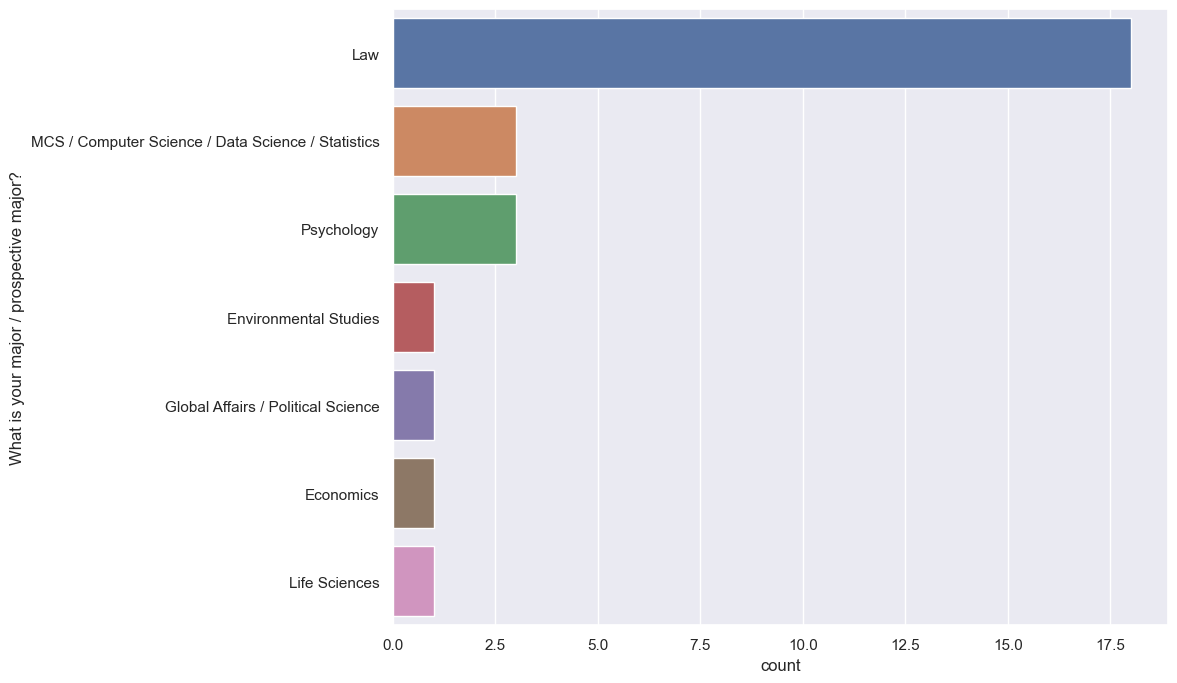

In [12]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(y = "What is your major / prospective major?", data = df_results, orient = "h", order = df_results["What is your major / prospective major?"].value_counts().index)

<AxesSubplot:xlabel='Do you have any experience with AI / data science / programming?', ylabel='count'>

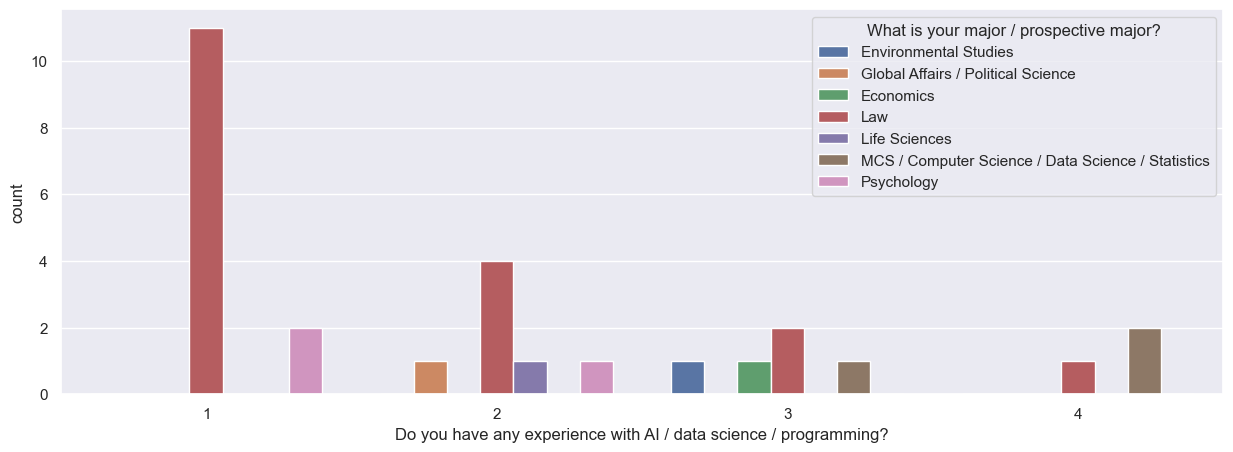

In [13]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x = "Do you have any experience with AI / data science / programming?", data = df_results, hue = "What is your major / prospective major?")

<AxesSubplot:xlabel='Do you have any experience with regarding data privacy / law?', ylabel='count'>

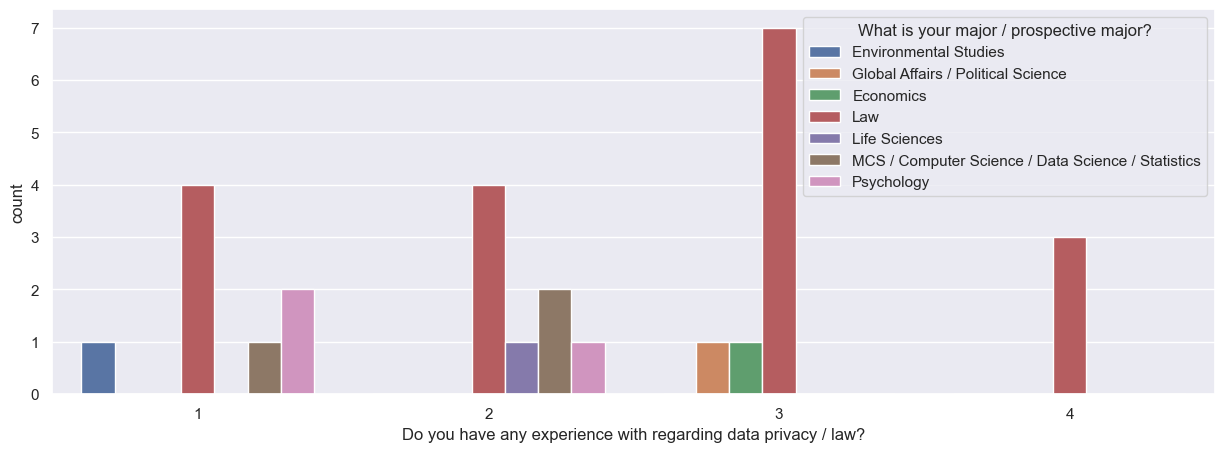

In [14]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x = 'Do you have any experience with regarding data privacy / law?', data = df_results, hue = "What is your major / prospective major?")

<AxesSubplot:xlabel='Are you concerned about your data privacy?', ylabel='count'>

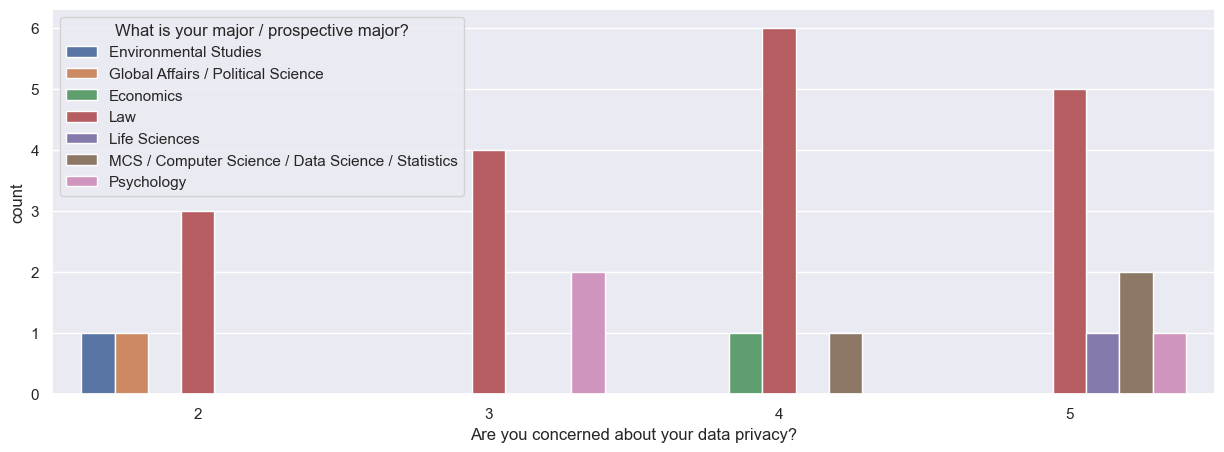

In [15]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x = 'Are you concerned about your data privacy?', data = df_results, hue = "What is your major / prospective major?")

<AxesSubplot:xlabel='How would you rate your capability in protecting your online data?', ylabel='count'>

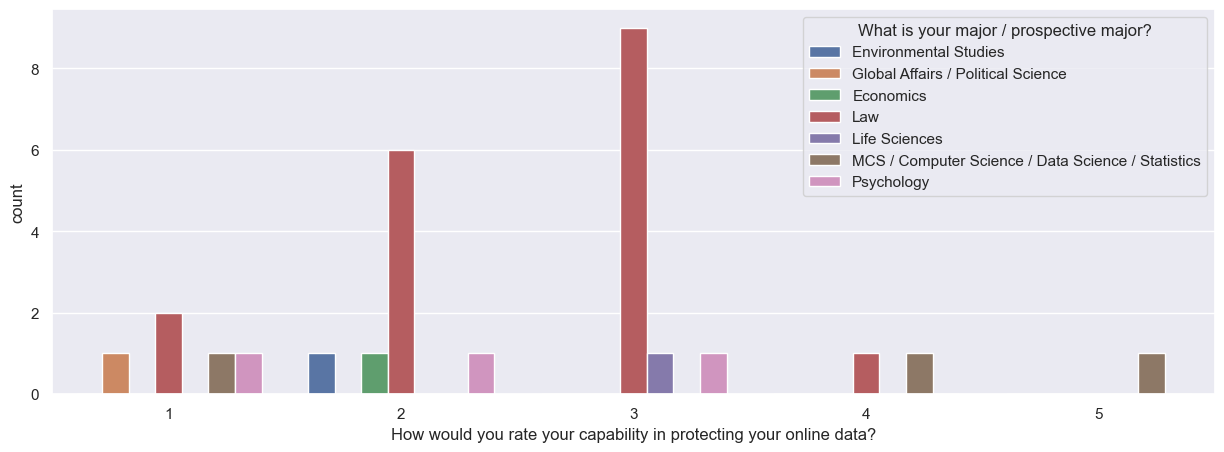

In [16]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x = 'How would you rate your capability in protecting your online data?', data = df_results, hue = "What is your major / prospective major?")

<AxesSubplot:xlabel='Do you think decisions that are made by AI can be useful to society?', ylabel='count'>

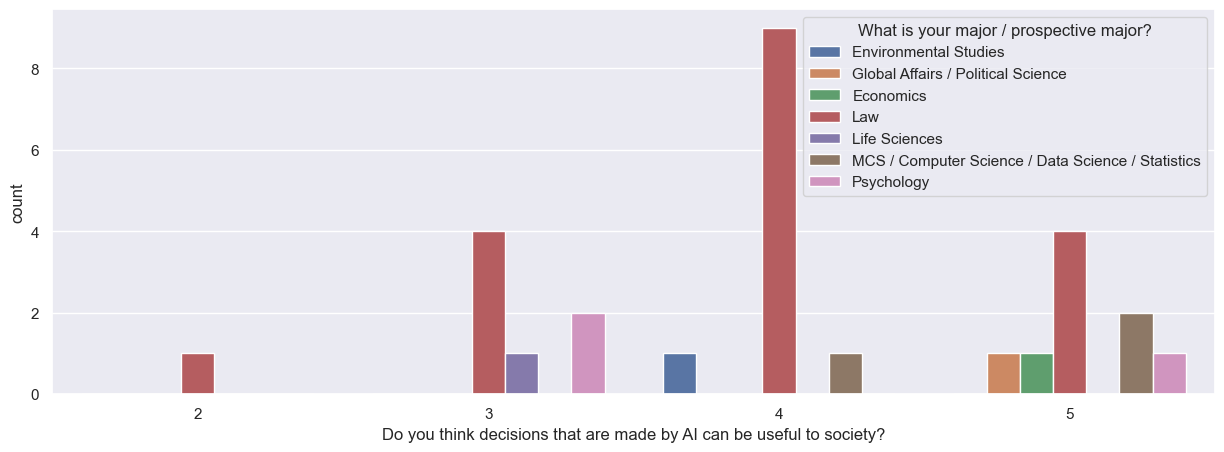

In [17]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x = 'Do you think decisions that are made by AI can be useful to society?', data = df_results, hue = "What is your major / prospective major?")

<AxesSubplot:xlabel='Do you think decisions made by AI are fair?', ylabel='count'>

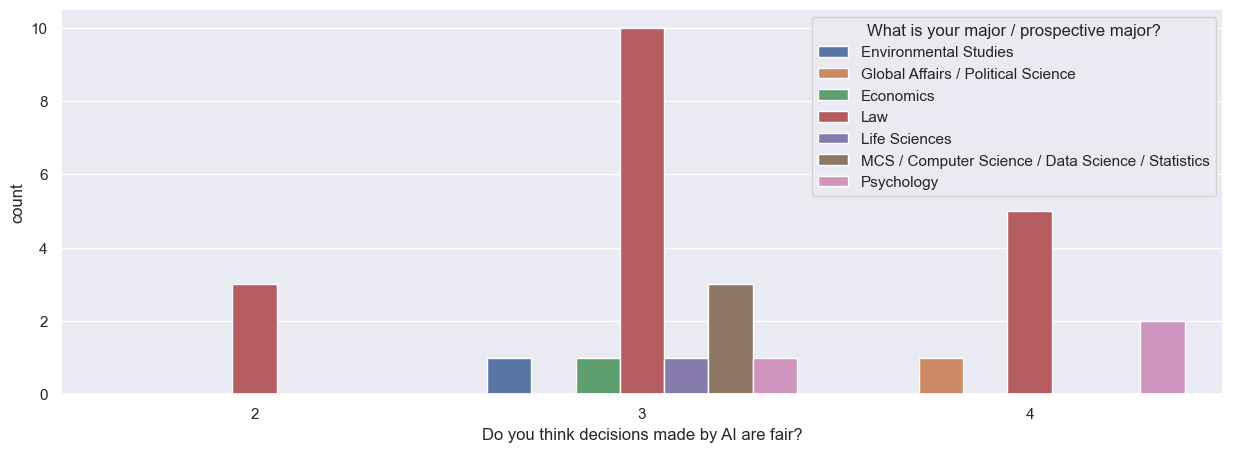

In [18]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x = 'Do you think decisions made by AI are fair?', data = df_results, hue = "What is your major / prospective major?")

#### Comparing scores of the contexts before and after looking at the explanations

In [19]:
# Cols from initial questioning
print(df_results.columns[12:24])

Index(['Think that using the model is an effective method of identifying violations of the PDPA?',
       'Think that using the model is a fair method of identifying violations of the PDPA?',
       'Think that using the model is a method that could be a risk to society?',
       'Trust the prediction made by the model?',
       'Think that using the model is an effective method of identifying violations of the PDPA?.1',
       'Think that using the model is a fair method of identifying violations of the PDPA?.1',
       'Think that using the model is a method that could be a risk to society?.1',
       'Trust the prediction made by the model?.1',
       'Think that using the model is an effective method of identifying violations of the PDPA?.2',
       'Think that using the model is a fair method of identifying violations of the PDPA?.2',
       'Think that using the model is a method that could be a risk to society?.2',
       'Trust the prediction made by the model?.2'],
      dtype

In [20]:
# Cols from last questioning
print(df_results.columns[45: -1])

Index(['Think that using the model is an effective method of identifying violations of the PDPA?.3',
       'Think that using the model is a fair method of identifying violations of the PDPA?.3',
       'Think that using the model is a method that could be a risk to society?.3',
       'Trust the prediction made by the model?.3',
       'Think that using the model is an effective method of identifying violations of the PDPA?.4',
       'Think that using the model is a fair method of identifying violations of the PDPA?.4',
       'Think that using the model is a method that could be a risk to society?.4',
       'Trust the prediction made by the model?.4',
       'Think that using the model is an effective method of identifying violations of the PDPA?.5',
       'Think that using the model is a fair method of identifying violations of the PDPA?.5',
       'Think that using the model is a method that could be a risk to society?.5',
       'Trust the prediction made by the model?.5'],
   

### Comparing whether there is a significant difference amongst the respondents for the 3 contexts before and after they have viewed the explanations

Using significance testing: wilcoxon test

By using "less", it means that the distribution underlying d is stochastically less than a distribution symmetric about zero.

Where d = initial - final

So if d is negative, means that final scores are significantly higher than intial?

i.e. Respondents rated the model as more effective after looking at the visualisations

| **Question**                                  | **Context 1: Less** | **Context 1: Greater** | **Context 2: Less** | **Context 2: Greater** | **Context 3: Less** | **Context 3: Greater** |
|-----------------------------------------------|---------------------|------------------------|---------------------|------------------------|---------------------|------------------------|
| **Do you think model is effective?**          | 0.004               | 0.995                  | 0.98                | 0.014                  | 0.78                | 0.21                   |
| **Do you think model is a fair method?**      | 0.388               | 0.611                  | 0.90                | 0.098                  | 0.93                | 0.061                  |
| **Do you think model is a risk to society?**  | 0.64                | 0.35                   | 0.42                | 0.57                   | 0.72                | 0.27                   |
| **Do you trust the prediction of the model?** | 0.92                | 0.070                  | 0.99                | 0.0092                 | 0.80                | 0.19                   |

In [21]:
from scipy.stats import wilcoxon

#### First context, first question: Is model effective?

Less produces p < 0.05, hence underlying distribution of the difference of initial - final is less than symmetric about 0.

Hence, model is rated significantly more effective after respondents viewed the explanations

In [22]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.3"],
alternative= "less")

print(p)
print(stat)

0.004727607958018934
21.0


In [23]:
# Checking if greater
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.3"],
alternative= "greater")

print(p)
print(stat)

0.995272392041981
21.0


#### First context, second question: Is model fair?

Both less and greater does not produce p < 0.05, hence no significant difference.

In [24]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.3"],
alternative= "less")

print(p)
print(stat)

0.38810264854694215
30.0


In [25]:
# Checking if greater
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.3"],
alternative= "greater")

print(p)
print(stat)

0.6118973514530578
30.0


#### First context, third question: Is model a risk to society?

Both less and greater does not produce p < 0.05, hence no significant difference.

In [26]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?"], 
df_results["Think that using the model is a method that could be a risk to society?.3"],
alternative= "less")

print(p)
print(stat)

0.6410212939856943
58.0


In [27]:
# Checking if greater
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?"], 
df_results["Think that using the model is a method that could be a risk to society?.3"],
alternative= "greater")

print(p)
print(stat)

0.35897870601430565
58.0


#### First context, fourth question: Do you trust prediction of the model?

Both less and greater does not produce p < 0.05, hence no significant difference.

BUT p value = 0.07 when testing for "greater", so it is almost statistically significant that trust has dropped after respondents have looked at the explanations.

Means that perhaps respondents realise that AI is not as "smart" as it is made out to be.

In [28]:
# Checking if less
stat, p = wilcoxon(df_results["Trust the prediction made by the model?"], 
df_results["Trust the prediction made by the model?.3"],
alternative= "less")

print(p)
print(stat)

0.9297009869977304
129.0


In [29]:
# Checking if less
stat, p = wilcoxon(df_results["Trust the prediction made by the model?"], 
df_results["Trust the prediction made by the model?.3"],
alternative= "greater")

print(p)
print(stat)

0.07029901300226954
129.0


#### Second context, first question: Is model effective? (respondent is member of the PDPC)

Greater produces p < 0.05, hence underlying distribution of the difference of initial - final is greater than symmetric about 0.

Hence, model is rated significantly less effective after respondents viewed the explanations

In [30]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?.1"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.4"],
alternative= "less")

print(p)
print(stat)

0.9854754889190297
66.0


In [31]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?.1"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.4"],
alternative= "greater")

print(p)
print(stat)

0.014524511080970285
66.0


#### Second context, second question: Is model fair?

p < .05 for both instances, so cannot conclude that the difference is statistically significant.

BUT p = 0.1 when testing for "greater", so initial mean > final mean, indicates that there is also a drop of perception as to whether model is fair.

In [32]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?.1"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.4"],
alternative= "less")

print(p)
print(stat)

0.9016471987705266
54.0


In [33]:
# Checking if less
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?.1"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.4"],
alternative= "greater")

print(p)
print(stat)

0.09835280122947343
54.0


#### Second context, third question: Is model a risk to society?

No perceptible difference

In [34]:
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?.1"], 
df_results["Think that using the model is a method that could be a risk to society?.4"],
alternative= "less")

print(p)
print(stat)

0.4270380304967267
31.0


In [35]:
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?.1"], 
df_results["Think that using the model is a method that could be a risk to society?.4"],
alternative= "greater")

print(p)
print(stat)

0.5729619695032734
31.0


#### Second context, fourth question: Do you trust results of model?

Trust has dropped significantly p < 0.009

In [36]:
stat, p = wilcoxon(df_results["Trust the prediction made by the model?.1"], 
df_results["Trust the prediction made by the model?.4"],
alternative= "less")

print(p)
print(stat)

0.9907855571193427
123.0


In [37]:
stat, p = wilcoxon(df_results["Trust the prediction made by the model?.1"], 
df_results["Trust the prediction made by the model?.4"],
alternative= "greater")

print(p)
print(stat)

0.00921444288065732
123.0


#### Third context, first question: Is model effective?

In [38]:
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?.2"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.5"],
alternative= "less")

print(p)
print(stat)

0.7838258746619716
73.0


In [39]:
stat, p = wilcoxon(df_results["Think that using the model is an effective method of identifying violations of the PDPA?.2"], 
df_results["Think that using the model is an effective method of identifying violations of the PDPA?.5"],
alternative= "greater")

print(p)
print(stat)

0.21617412533802838
73.0


#### Third context, second question: Is model fair?

In [40]:
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?.2"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.5"],
alternative= "less")

print(p)
print(stat)

0.938616922894568
76.0


In [41]:
stat, p = wilcoxon(df_results["Think that using the model is a fair method of identifying violations of the PDPA?.2"], 
df_results["Think that using the model is a fair method of identifying violations of the PDPA?.5"],
alternative= "greater")

print(p)
print(stat)

0.061383077105432
76.0


#### Third context, third question: Is model a risk to society?

In [42]:
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?.2"], 
df_results["Think that using the model is a method that could be a risk to society?.5"],
alternative= "less")

print(p)
print(stat)

0.7294829055221703
54.0


In [43]:
stat, p = wilcoxon(df_results["Think that using the model is a method that could be a risk to society?.2"], 
df_results["Think that using the model is a method that could be a risk to society?.5"],
alternative= "greater")

print(p)
print(stat)

0.2705170944778297
54.0


#### Third context, fourth question: Do you trust the model?

In [44]:
stat, p = wilcoxon(df_results["Trust the prediction made by the model?.2"], 
df_results["Trust the prediction made by the model?.5"],
alternative= "less")

print(p)
print(stat)

0.8019637677307172
57.0


In [45]:
stat, p = wilcoxon(df_results["Trust the prediction made by the model?.2"], 
df_results["Trust the prediction made by the model?.5"],
alternative= "greater")

print(p)
print(stat)

0.19803623226928274
57.0


#### Plotting the differences

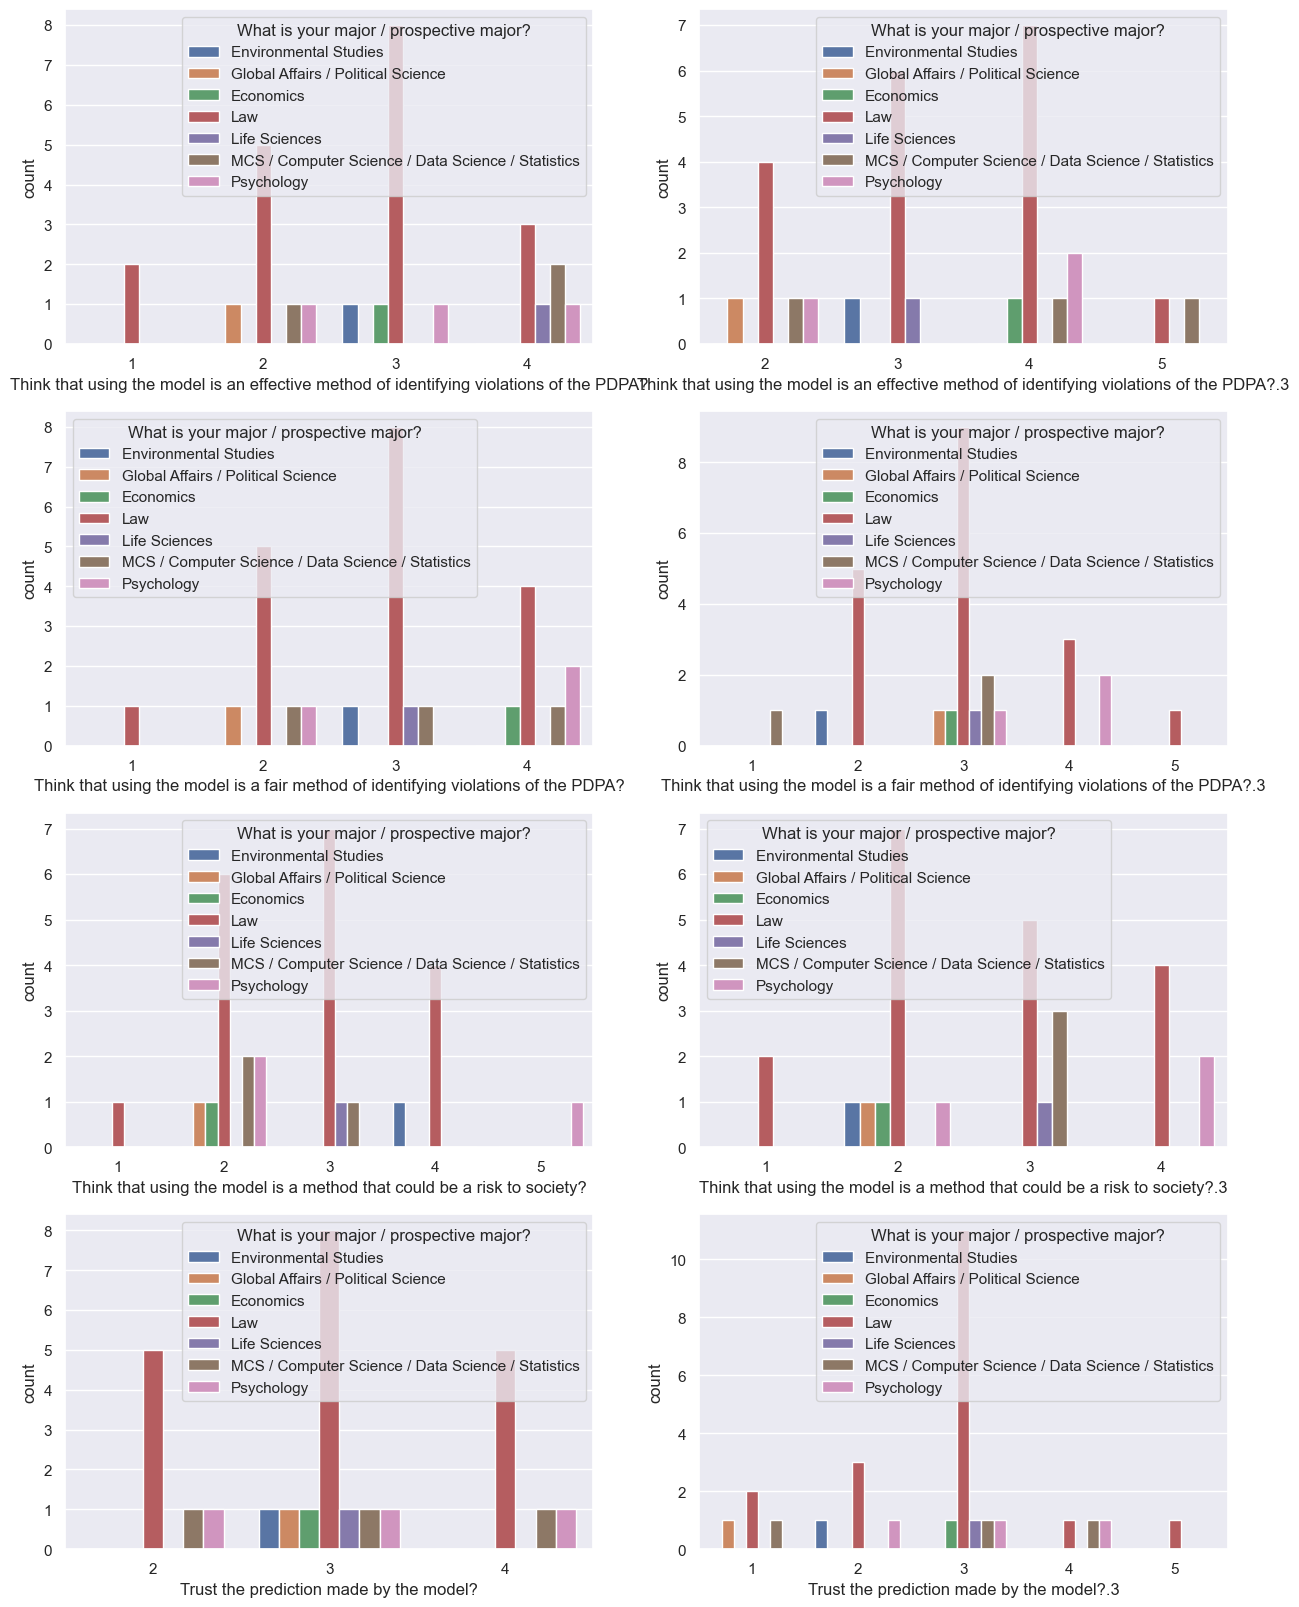

In [50]:
# Comparing for context 1
fig, ax = plt.subplots(4, 2)
sns.set(rc={'figure.figsize':(15,20)})

# First question
sns.countplot(x = 'Think that using the model is an effective method of identifying violations of the PDPA?', data = df_results, hue = "What is your major / prospective major?", ax = ax[0, 0])
sns.countplot(x = 'Think that using the model is an effective method of identifying violations of the PDPA?.3', data = df_results, hue = "What is your major / prospective major?", ax = ax[0, 1])

# Second question
sns.countplot(x = 'Think that using the model is a fair method of identifying violations of the PDPA?', data = df_results, hue = "What is your major / prospective major?", ax = ax[1, 0])
sns.countplot(x = 'Think that using the model is a fair method of identifying violations of the PDPA?.3', data = df_results, hue = "What is your major / prospective major?", ax = ax[1, 1])

# third question
sns.countplot(x = 'Think that using the model is a method that could be a risk to society?', data = df_results, hue = "What is your major / prospective major?", ax = ax[2, 0])
sns.countplot(x = 'Think that using the model is a method that could be a risk to society?.3', data = df_results, hue = "What is your major / prospective major?", ax = ax[2, 1])

# Fourth question
sns.countplot(x = 'Trust the prediction made by the model?', data = df_results, hue = "What is your major / prospective major?", ax = ax[3, 0])
sns.countplot(x = 'Trust the prediction made by the model?.3', data = df_results, hue = "What is your major / prospective major?", ax = ax[3, 1])

plt.show()

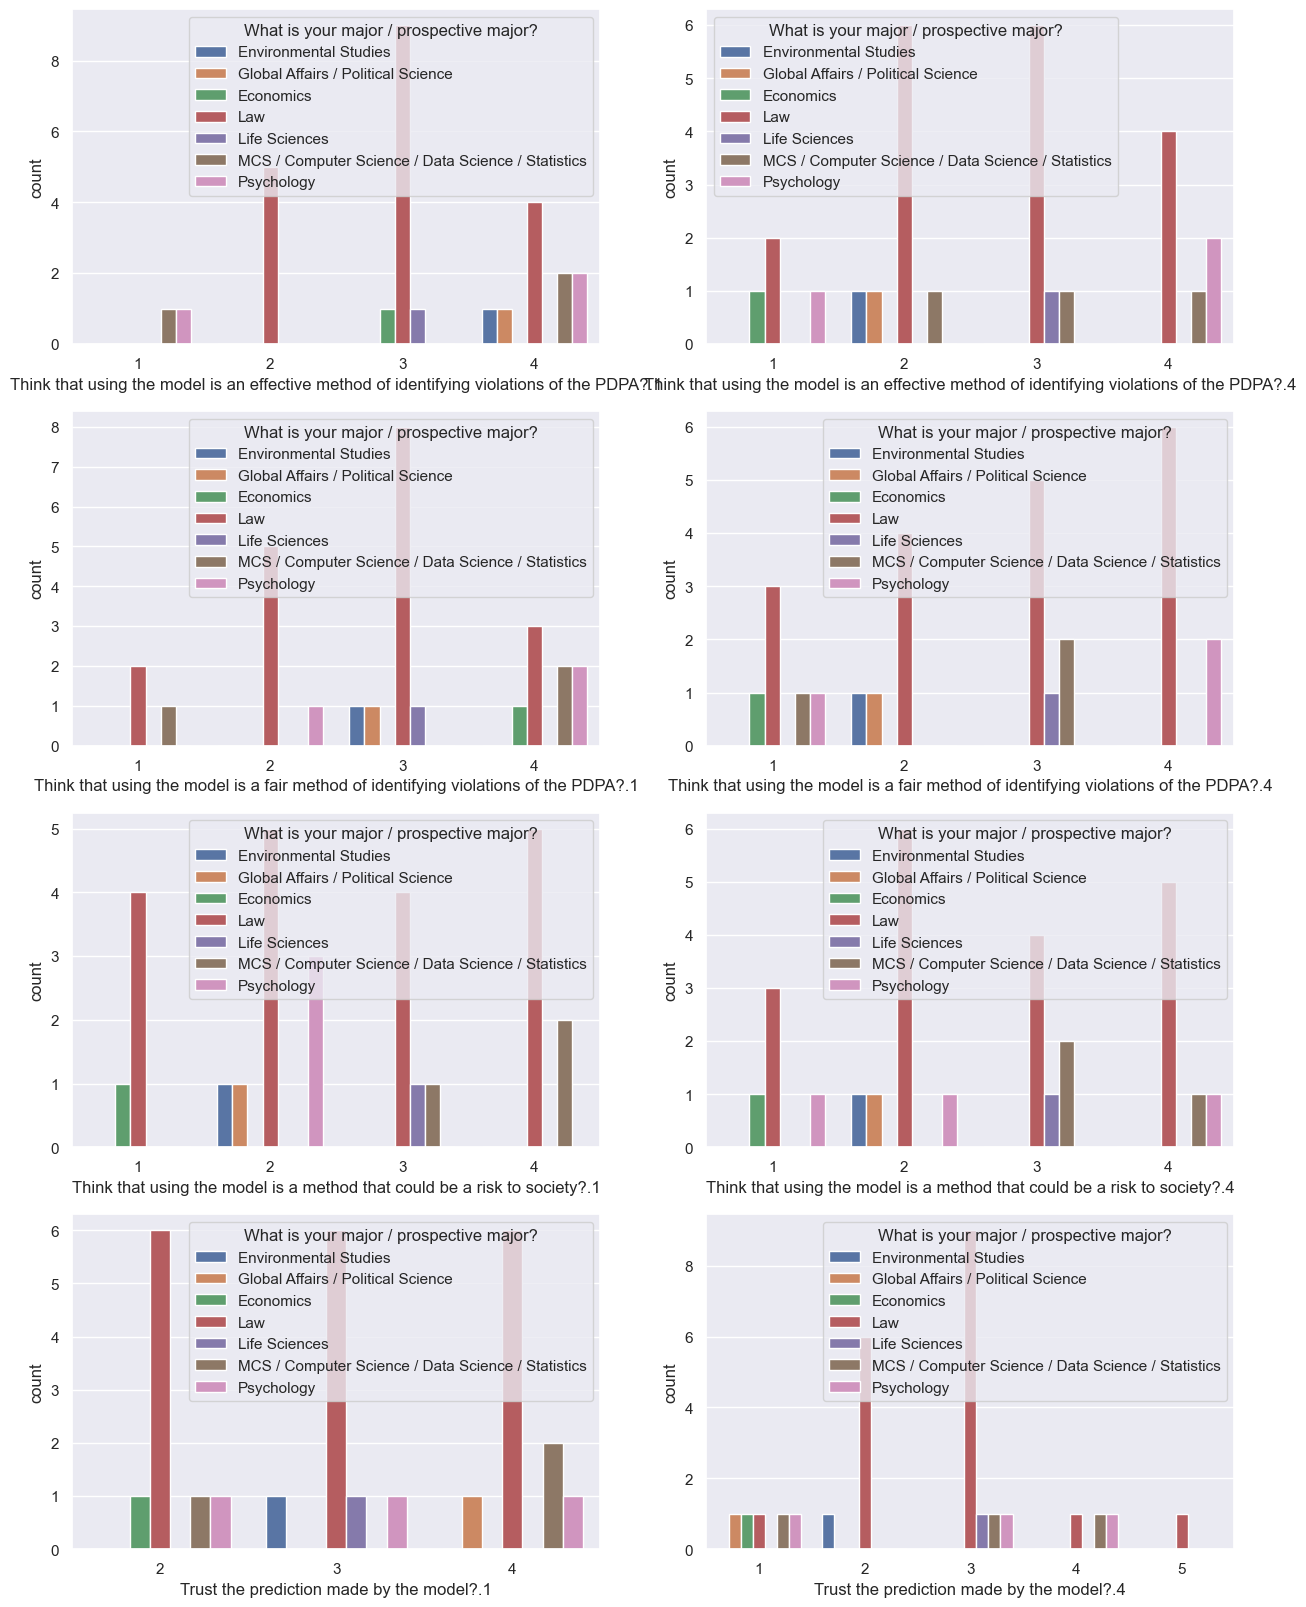

In [51]:
# Comparing for context 1
fig, ax = plt.subplots(4, 2)
sns.set(rc={'figure.figsize':(15,20)})

# First question
sns.countplot(x = 'Think that using the model is an effective method of identifying violations of the PDPA?.1', data = df_results, hue = "What is your major / prospective major?", ax = ax[0, 0])
sns.countplot(x = 'Think that using the model is an effective method of identifying violations of the PDPA?.4', data = df_results, hue = "What is your major / prospective major?", ax = ax[0, 1])

# Second question
sns.countplot(x = 'Think that using the model is a fair method of identifying violations of the PDPA?.1', data = df_results, hue = "What is your major / prospective major?", ax = ax[1, 0])
sns.countplot(x = 'Think that using the model is a fair method of identifying violations of the PDPA?.4', data = df_results, hue = "What is your major / prospective major?", ax = ax[1, 1])

# third question
sns.countplot(x = 'Think that using the model is a method that could be a risk to society?.1', data = df_results, hue = "What is your major / prospective major?", ax = ax[2, 0])
sns.countplot(x = 'Think that using the model is a method that could be a risk to society?.4', data = df_results, hue = "What is your major / prospective major?", ax = ax[2, 1])

# Fourth question
sns.countplot(x = 'Trust the prediction made by the model?.1', data = df_results, hue = "What is your major / prospective major?", ax = ax[3, 0])
sns.countplot(x = 'Trust the prediction made by the model?.4', data = df_results, hue = "What is your major / prospective major?", ax = ax[3, 1])

plt.show()

### Whether there is a significant preference between the two models in part 4 and part 5

#### For Log + glove vs svc + glove

Overall votes:

1st model: 2 + 1 + 4 = 7

2nd model: 1 + 7 + 1 = 9

No difference: 17 + 12 + 15 = 44

In [52]:
# Part 4: Comparing between log + glove vs svc + glove
print(df_results.columns[39:42])

Index(['Which explanation did you find easier to interpret?',
       'Which explanation did you find easier to interpret?.1',
       'Which explanation did you find easier to interpret?.2'],
      dtype='object')


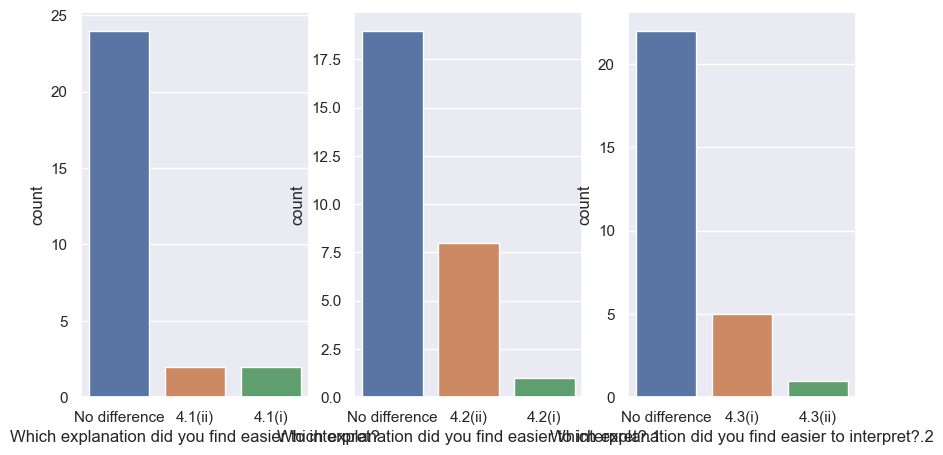

In [66]:
# Per question
fig, ax = plt.subplots(1, 3)
sns.set(rc={'figure.figsize':(10,5)})

sns.countplot(x = 'Which explanation did you find easier to interpret?', data = df_results, ax = ax[0])
sns.countplot(x = 'Which explanation did you find easier to interpret?.1', data = df_results, ax = ax[1])
sns.countplot(x = 'Which explanation did you find easier to interpret?.2', data = df_results, ax = ax[2])
plt.show()

In [54]:
df_results[df_results.columns[39:42]].apply(pd.Series.value_counts)

,Which explanation did you find easier to interpret?,Which explanation did you find easier to interpret?.1,Which explanation did you find easier to interpret?.2
4.1(i),2.0,NaN,NaN
4.1(ii),2.0,NaN,NaN
4.2(i),NaN,1.0,NaN
4.2(ii),NaN,8.0,NaN
4.3(i),NaN,NaN,5.0
4.3(ii),NaN,NaN,1.0
No difference,24.0,19.0,22.0


### Part 5: Comparing between svc + tfidf vs svc + glove

#### Total no. of votes across the questions

1st model: 9 + 5 + 4 = 29

2nd model: 5 + 10 + 10 = 30

No difference: 6 + 5 + 4 = 25

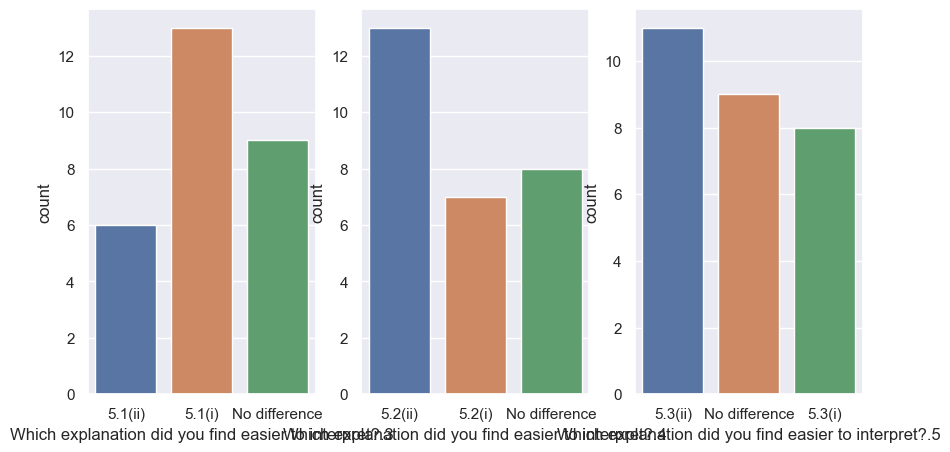

In [55]:
fig, ax = plt.subplots(1, 3)
sns.set(rc={'figure.figsize':(10,5)})

sns.countplot(x = 'Which explanation did you find easier to interpret?.3', data = df_results, ax = ax[0])
sns.countplot(x = 'Which explanation did you find easier to interpret?.4', data = df_results, ax = ax[1])
sns.countplot(x = 'Which explanation did you find easier to interpret?.5', data = df_results, ax = ax[2])
plt.show()

In [56]:
df_results[df_results.columns[42:45]].apply(pd.Series.value_counts)

,Which explanation did you find easier to interpret?.3,Which explanation did you find easier to interpret?.4,Which explanation did you find easier to interpret?.5
5.1(i),13.0,NaN,NaN
5.1(ii),6.0,NaN,NaN
5.2(i),NaN,7.0,NaN
5.2(ii),NaN,13.0,NaN
5.3(i),NaN,NaN,8.0
5.3(ii),NaN,NaN,11.0
No difference,9.0,8.0,9.0


### Part 3: Looking at whether the metrics of understanding increased over the questions 

In [57]:
# Part 3: Assessing understandability of log + tfidf
print(df_results.columns[24:39])

Index(['Do you understand why the model made the prediction?',
       'Why do you think the model made this prediction? ',
       'Did you find the visualisation easy to interpret?',
       'Do you understand why the model made the prediction?.1',
       'Why do you think the model made this prediction? .1',
       'Did you find the visualisation easy to interpret?.1',
       'Based on your current understanding, do you think that the sentence below would be predicted to be "Identifier_Cookie_or_Similar_Tech_1stParty"?\n\n"We also use tracking technologies to keep records, store your preferences, improve our advertising, and collect Non-Identifying Information, including Device Data and information about your interaction with the Site and our Business Partners' web sites."',
       'Do you understand why the model made the prediction?.2',
       'Why do you think the model made this prediction?',
       'Did you find the visualisation easy to interpret?.2',
       'Based on your curren

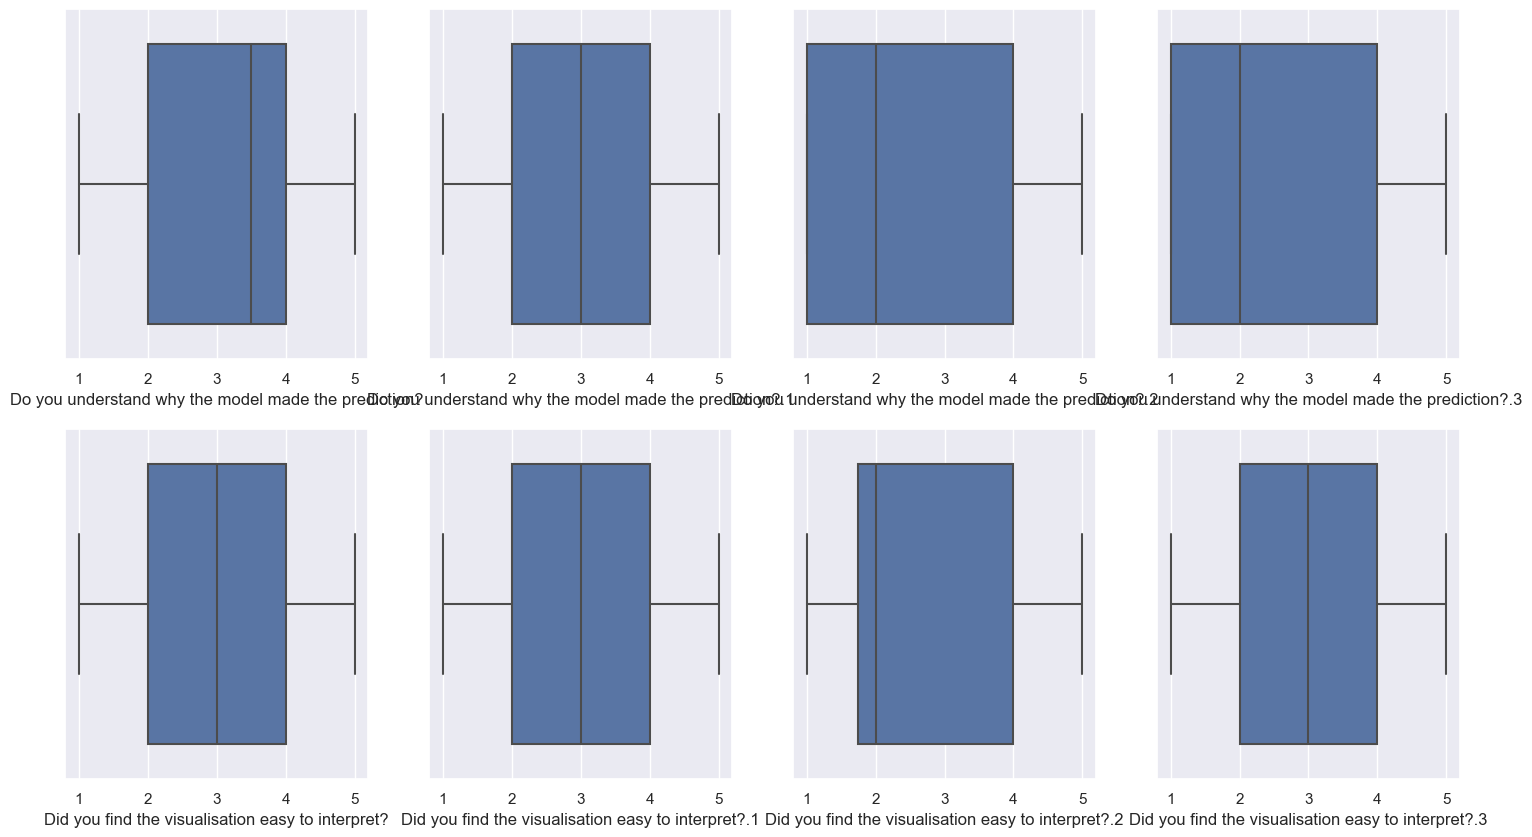

In [68]:
fig, ax = plt.subplots(2, 4)
sns.set(rc={'figure.figsize':(18,10)})

sns.boxplot(x = "Do you understand why the model made the prediction?", data = df_results, ax = ax[0, 0])
sns.boxplot(x = "Do you understand why the model made the prediction?.1", data = df_results, ax = ax[0, 1])
sns.boxplot(x = "Do you understand why the model made the prediction?.2", data = df_results, ax = ax[0, 2])
sns.boxplot(x = "Do you understand why the model made the prediction?.3", data = df_results, ax = ax[0, 3])

sns.boxplot(x = "Did you find the visualisation easy to interpret?", data = df_results, ax = ax[1, 0])
sns.boxplot(x = "Did you find the visualisation easy to interpret?.1", data = df_results, ax = ax[1, 1])
sns.boxplot(x = "Did you find the visualisation easy to interpret?.2", data = df_results, ax = ax[1, 2])
sns.boxplot(x = "Did you find the visualisation easy to interpret?.3", data = df_results, ax = ax[1, 3])
plt.show()

In [59]:
# Take the average of each question and compare since distributions aren't very meaningful
part3_understand = []
part3_interpret = []

part3_understand.append(df_results["Do you understand why the model made the prediction?"].mean())
part3_understand.append(df_results["Do you understand why the model made the prediction?.1"].mean())
part3_understand.append(df_results["Do you understand why the model made the prediction?.2"].mean())
part3_understand.append(df_results["Do you understand why the model made the prediction?.3"].mean())

part3_interpret.append(df_results["Did you find the visualisation easy to interpret?"].mean())
part3_interpret.append(df_results["Did you find the visualisation easy to interpret?.1"].mean())
part3_interpret.append(df_results["Did you find the visualisation easy to interpret?.2"].mean())
part3_interpret.append(df_results["Did you find the visualisation easy to interpret?.3"].mean())

In [60]:
df_part3 = pd.DataFrame(
    data = {
        "question_no" : [n for n in range(1, 5)],
        "understand" : part3_understand,
        "interpret" : part3_interpret
    }
)

df_part3.head()

,question_no,understand,interpret
0,1,3.250000,3.035714
1,2,2.928571,2.892857
2,3,2.535714,2.607143
3,4,2.500000,2.821429


In [61]:
df_part3 = pd.melt(df_part3, id_vars = ["question_no"], value_vars = ["understand", "interpret"], value_name="score", var_name = "metric")

df_part3.head()

,question_no,metric,score
0,1,understand,3.250000
1,2,understand,2.928571
2,3,understand,2.535714
3,4,understand,2.500000
4,1,interpret,3.035714


<AxesSubplot:xlabel='question_no', ylabel='score'>

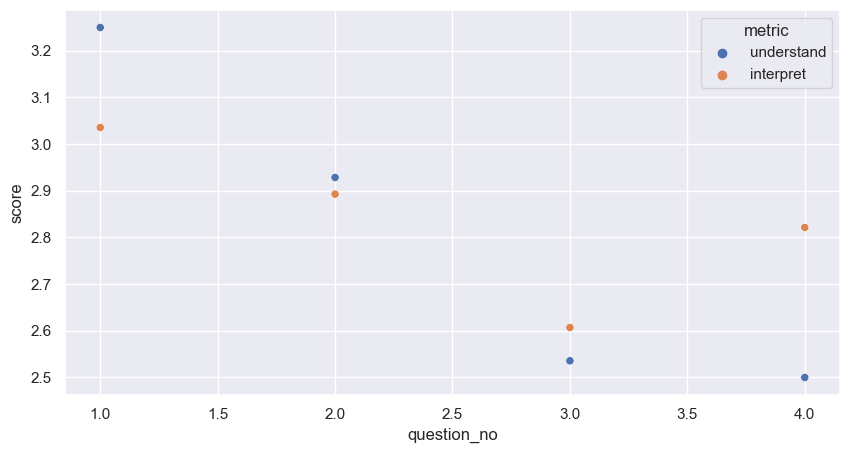

In [62]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(x = "question_no", y = "score", data = df_part3, hue = "metric")